# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [36]:
df=pd.read_csv("data\grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [8]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [9]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [10]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

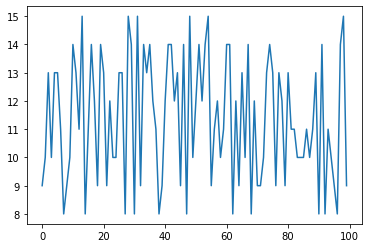

In [11]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

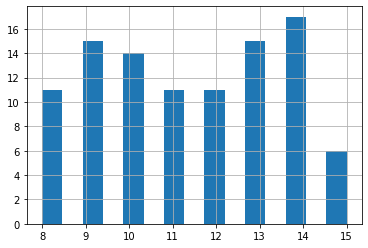

In [16]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [17]:
df.國文.mean()

11.39

算標準差。

In [18]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [19]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [20]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [28]:
df.國文.corr(df.自然)

-0.11023608610722806

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [37]:
df["總級分"]=df.sum(axis=1)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [38]:
df["加權"]=df.國文+df.英文+df.數學*2

In [39]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [41]:
df.sort_values(by="總級分",ascending=False).head(20)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [43]:
df2=df.sort_values(by=["加權","總級分"],ascending=False)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,51,36
84,胡凱琳,10,8,9,9,15,51,36
32,林建亨,9,11,8,8,11,47,36
18,梁慧君,9,8,8,8,12,45,33


### 【重點】重設 index

In [47]:
df2.index=range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [49]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [53]:
df2[((df2.數學==15)&(df2.英文==15))]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [57]:
#df2=df2.drop("總級分",axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [58]:
df2["總級分"]=df2.sum(axis=1)
df2.drop("總級分",axis=1,inplace=True)
df2.tail()

,姓名,國文,英文,數學,自然,社會,加權
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33
100,吳文伯,8,8,8,15,12,32


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [59]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


In [47]:
#df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [64]:
df2[df2.姓名=="李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
5,李士賢,10,14,15,13,13,54


In [62]:
df2.drop(df2[df2.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [67]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [68]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [69]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-09-16,29.032499,28.510000,28.780001,28.730000,319547600.0,26.944162
2016-09-19,29.045000,28.312500,28.797501,28.395000,188092000.0,26.629980
2016-09-20,28.530001,28.127501,28.262501,28.392500,138057200.0,26.627634
2016-09-21,28.497499,28.110001,28.462500,28.387501,144012800.0,26.622948
2016-09-22,28.735001,28.500000,28.587500,28.655001,124296000.0,26.873819


#### 只要最後 300 個交易日!

In [70]:
df=df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-09,96.317497,94.672501,96.262497,95.752502,125642800.0,94.969345
2020-07-10,95.980003,94.705002,95.334999,95.919998,90257200.0,95.135475
2020-07-13,99.955002,95.257500,97.264999,95.477501,191649200.0,94.696594
2020-07-14,97.254997,93.877502,94.839996,97.057503,170989200.0,96.263672
2020-07-15,99.247498,96.489998,98.989998,97.724998,153198000.0,96.925705
...,...,...,...,...,...,...
2021-09-09,156.110001,153.949997,155.490005,154.070007,57305700.0,154.070007
2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

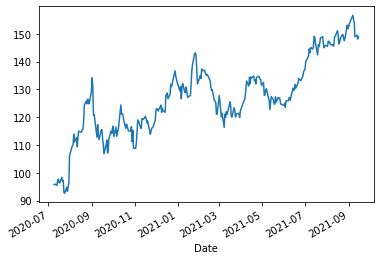

In [72]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

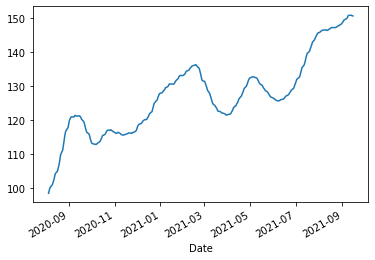

In [73]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

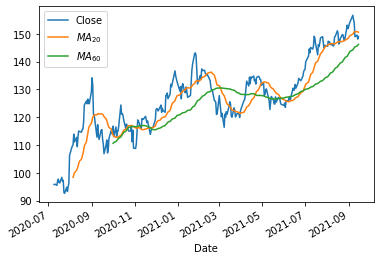

In [75]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [77]:
close=df.Close.values
len(close)

300

In [78]:
x=close[:-1]
len(x)

299

In [82]:
y=close[1:]
len(y)

299

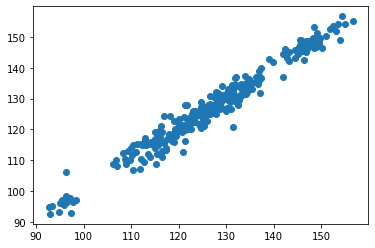

In [84]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [85]:
import numpy as np
mydata = np.random.randn(4,3)

In [86]:
mydata

array([[ 1.11232414,  0.16638373, -0.59640118],
       [ 0.26451869, -0.08277794,  1.50063084],
       [-0.38968623,  0.49463666, -0.21976025],
       [-1.63442792, -0.13838233, -0.3525867 ]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [88]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [89]:
df2

,A,B,C
0,1.112324,0.166384,-0.596401
1,0.264519,-0.082778,1.500631
2,-0.389686,0.494637,-0.219760
3,-1.634428,-0.138382,-0.352587


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [90]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [91]:
df3

,A,B,C
0,0.533666,-0.165643,0.772611
1,-1.048934,-0.779901,-1.180263
2,1.136410,-0.161046,-0.659696


In [92]:
df4=pd.concat([df2,df3],axis=0)

In [93]:
df4

,A,B,C
0,1.112324,0.166384,-0.596401
1,0.264519,-0.082778,1.500631
2,-0.389686,0.494637,-0.219760
3,-1.634428,-0.138382,-0.352587
0,0.533666,-0.165643,0.772611
1,-1.048934,-0.779901,-1.180263
2,1.136410,-0.161046,-0.659696


前面我們弄得亂七八糟的 index 重設一下。

In [94]:
df4.index=range(7)

In [95]:
df4

,A,B,C
0,1.112324,0.166384,-0.596401
1,0.264519,-0.082778,1.500631
2,-0.389686,0.494637,-0.219760
3,-1.634428,-0.138382,-0.352587
4,0.533666,-0.165643,0.772611
5,-1.048934,-0.779901,-1.180263
6,1.136410,-0.161046,-0.659696


#### 横向的貼

In [96]:
df5=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [97]:
df5

,A,B,C,A,B,C
0,1.112324,0.166384,-0.596401,0.533666,-0.165643,0.772611
1,0.264519,-0.082778,1.500631,-1.048934,-0.779901,-1.180263
2,-0.389686,0.494637,-0.219760,1.136410,-0.161046,-0.659696
3,-1.634428,-0.138382,-0.352587,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [103]:
df_names=pd.read_csv('C:\\Users\\XinHuang\\Desktop\\Python機器學習入門\\Unit2_DA package\\Unit02\\data\\names.csv',names=['姓名'])

In [104]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [106]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [107]:
df_grades

,國文,英文,數學,社會,自然
0,6,13,7,8,10
1,9,7,6,14,13
2,7,15,11,14,10
3,13,12,15,9,11
4,14,9,15,14,7
...,...,...,...,...,...
95,13,14,13,9,12
96,10,10,12,14,13
97,10,14,14,13,15
98,14,8,10,6,14


In [110]:
df_grades.to_csv("data\\temp_score.csv",index=0) #index=0讓index不被存入


In [112]:
df_grades=pd.read_csv("data\\temp_score.csv")
df_grades.head()

,國文,英文,數學,社會,自然
0,6,13,7,8,10
1,9,7,6,14,13
2,7,15,11,14,10
3,13,12,15,9,11
4,14,9,15,14,7


In [121]:
df_n=pd.read_csv('C:\\Users\\XinHuang\\Desktop\\Python機器學習入門\\Unit2_DA package\\Unit02\\data\\names.csv',names=['姓名'])
df_g = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])
df_g.to_csv("data\\false_score.csv")
df_g=pd.read_csv("data\\false_score.csv")
df_score_false=pd.concat([df_n,df_g],axis=1)
df_score_false

,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,10,7,14,13,12
1,王紹尹,1,7,9,15,12,13
2,黃季坤,2,14,6,12,15,14
3,許正書,3,10,8,6,6,9
4,張鈞蓮,4,8,11,12,15,7
...,...,...,...,...,...,...,...
95,陳君生,95,15,11,8,10,7
96,曾桂甫,96,9,8,6,10,12
97,林欣怡,97,11,12,11,8,10
98,林佳霖,98,13,15,7,14,11


In [113]:
df_score_practice=pd.concat([df_names,df_grades],axis=1)

In [114]:
df_score_practice

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,6,13,7,8,10
1,王紹尹,9,7,6,14,13
2,黃季坤,7,15,11,14,10
3,許正書,13,12,15,9,11
4,張鈞蓮,14,9,15,14,7
...,...,...,...,...,...,...
95,陳君生,13,14,13,9,12
96,曾桂甫,10,10,12,14,13
97,林欣怡,10,14,14,13,15
98,林佳霖,14,8,10,6,14
